In [1]:
import os
import pandas as pd
import plotly.express as px
import numpy as np
from scipy import stats
from scipy.stats.mstats import gmean

In [2]:
in_ndt = 'IES_Results_17Nov2021.ndt'
df = pd.read_csv(in_ndt, sep = '\s+')
df

,Node,X,Y,Layer,Zone,InitTCE_ppb,Kh_fromMS,kh_cps_Base,kh_cps_Calibration,kh_cps_Run000,...,Year_10_StdDevConc,Year_1_StdDevConc,Year_2_StdDevConc,Year_3_StdDevConc,Year_4_StdDevConc,Year_5_StdDevConc,Year_6_StdDevConc,Year_7_StdDevConc,Year_8_StdDevConc,Year_9_StdDevConc
0,1,342112.63,3787833.09,1,1,0.0,0.012200,0.000002,3.407303e-06,0.000002,...,3.256765e-04,3.902446e-05,1.147546e-04,1.832875e-04,2.344180e-04,2.748216e-04,3.023129e-04,3.180289e-04,3.249615e-04,3.272892e-04
1,2,342097.34,3787866.15,1,1,0.0,0.012200,0.000001,3.407304e-06,0.000001,...,4.202085e-04,4.023320e-05,1.241029e-04,2.077423e-04,2.739632e-04,3.252706e-04,3.617093e-04,3.861188e-04,4.016974e-04,4.130000e-04
2,3,342101.20,3787982.66,1,1,0.0,0.012200,0.000001,3.407304e-06,0.000001,...,1.315164e-03,3.817304e-04,7.941606e-04,1.078042e-03,1.208375e-03,1.252931e-03,1.260892e-03,1.267199e-03,1.277779e-03,1.294650e-03
3,4,342112.42,3787889.20,1,1,0.0,0.012200,0.000001,3.407303e-06,0.000001,...,2.178879e-04,4.722094e-05,1.109105e-04,1.611725e-04,1.901155e-04,2.090352e-04,2.180700e-04,2.214696e-04,2.224629e-04,2.210812e-04
4,5,342119.47,3787857.99,1,1,0.0,0.012200,0.000002,3.407304e-06,0.000002,...,1.072253e-04,3.638211e-05,4.404915e-05,5.202669e-05,6.593411e-05,8.102689e-05,9.325268e-05,1.013121e-04,1.060170e-04,1.077577e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257219,257220,343153.27,3786967.51,37,1,0.0,0.008640,0.000002,1.000001e-06,0.000002,...,3.556452e-24,8.287136e-36,9.246081e-33,6.585433e-31,4.812853e-29,7.211933e-28,7.486769e-27,5.801520e-26,3.504915e-25,1.155497e-24
257220,257221,343520.87,3787223.04,37,1,0.0,0.008640,0.000001,9.999997e-07,0.000001,...,3.960722e-27,3.070743e-34,1.039338e-31,1.639525e-30,1.407439e-29,6.108977e-29,1.982364e-28,5.244068e-28,1.192503e-27,2.247065e-27
257221,257222,342462.78,3788974.55,37,1,0.0,0.000026,0.000003,9.999997e-07,0.000003,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
257222,257223,343798.49,3788633.81,37,1,0.0,0.000026,0.000002,9.999998e-07,0.000002,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [3]:
zone_list = df['Zone'].values.tolist()
zone_list = list(set(zone_list))
zone_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

In [4]:
col_list = df.columns.to_list()
kVal_list = []
kVal_list.append('Zone')
for item in col_list:
    if 'kh' in item: #or 'KhKv' in item:
        kVal_list.append(item)
calix = kVal_list.index('kh_cps_Calibration')
kVal_list.pop(calix)
kVal_list.insert(1, 'kh_cps_Calibration')
kVal_list.insert(0, 'Layer')
kVal_list.insert(0, 'Node')
kVal_list

['Node',
 'Layer',
 'Zone',
 'kh_cps_Calibration',
 'kh_cps_Base',
 'kh_cps_Run000',
 'kh_cps_Run001',
 'kh_cps_Run002',
 'kh_cps_Run003',
 'kh_cps_Run004',
 'kh_cps_Run005',
 'kh_cps_Run006',
 'kh_cps_Run007',
 'kh_cps_Run008',
 'kh_cps_Run009']

In [8]:
avg_k_list = []
for item in kVal_list:
    if 'Run' in item or 'Base' in item:
        avg_k_list.append(item)
avg_k_list

['kh_cps_Base',
 'kh_cps_Run000',
 'kh_cps_Run001',
 'kh_cps_Run002',
 'kh_cps_Run003',
 'kh_cps_Run004',
 'kh_cps_Run005',
 'kh_cps_Run006',
 'kh_cps_Run007',
 'kh_cps_Run008',
 'kh_cps_Run009']

In [9]:
kdf = df[kVal_list].copy()
kdf

,Node,Layer,Zone,kh_cps_Calibration,kh_cps_Base,kh_cps_Run000,kh_cps_Run001,kh_cps_Run002,kh_cps_Run003,kh_cps_Run004,kh_cps_Run005,kh_cps_Run006,kh_cps_Run007,kh_cps_Run008,kh_cps_Run009
0,1,1,1,3.407303e-06,0.000002,0.000002,0.000002,0.000001,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
1,2,1,1,3.407304e-06,0.000001,0.000001,0.000001,0.000001,0.000001,0.000002,0.000001,0.000001,0.000001,0.000001,0.000001
2,3,1,1,3.407304e-06,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
3,4,1,1,3.407303e-06,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
4,5,1,1,3.407304e-06,0.000002,0.000002,0.000002,0.000001,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257219,257220,37,1,1.000001e-06,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
257220,257221,37,1,9.999997e-07,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
257221,257222,37,1,9.999997e-07,0.000003,0.000003,0.000003,0.000002,0.000003,0.000003,0.000003,0.000003,0.000003,0.000002,0.000002
257222,257223,37,1,9.999998e-07,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002


In [10]:
kdf['kh_cps_IES_Avg'] = kdf[avg_k_list].mean(axis = 1)
kdf

,Node,Layer,Zone,kh_cps_Calibration,kh_cps_Base,kh_cps_Run000,kh_cps_Run001,kh_cps_Run002,kh_cps_Run003,kh_cps_Run004,kh_cps_Run005,kh_cps_Run006,kh_cps_Run007,kh_cps_Run008,kh_cps_Run009,kh_cps_IES_Avg
0,1,1,1,3.407303e-06,0.000002,0.000002,0.000002,0.000001,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
1,2,1,1,3.407304e-06,0.000001,0.000001,0.000001,0.000001,0.000001,0.000002,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
2,3,1,1,3.407304e-06,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
3,4,1,1,3.407303e-06,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
4,5,1,1,3.407304e-06,0.000002,0.000002,0.000002,0.000001,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257219,257220,37,1,1.000001e-06,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
257220,257221,37,1,9.999997e-07,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
257221,257222,37,1,9.999997e-07,0.000003,0.000003,0.000003,0.000002,0.000003,0.000003,0.000003,0.000003,0.000003,0.000002,0.000002,0.000003
257222,257223,37,1,9.999998e-07,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002


In [11]:
kdf.to_csv('IES_Nodal_KVals.csv', index = False)

In [16]:
zone_avg = kdf.groupby(by = ['Zone']).mean()
zone_avg.drop(columns = ['Node', 'Layer'], inplace = True)
k_headers = zone_avg.columns.to_list()
zone_avg.reset_index(inplace = True)
zone_avg

,Zone,kh_cps_Calibration,kh_cps_Base,kh_cps_Run000,kh_cps_Run001,kh_cps_Run002,kh_cps_Run003,kh_cps_Run004,kh_cps_Run005,kh_cps_Run006,kh_cps_Run007,kh_cps_Run008,kh_cps_Run009,kh_cps_IES_Avg
0,1,7.333125e-06,7.212780e-06,7.081951e-06,7.218103e-06,7.171147e-06,7.088381e-06,7.214016e-06,7.196076e-06,7.164575e-06,7.257333e-06,7.238418e-06,7.238418e-06,7.189200e-06
1,2,1.020119e-08,2.149061e-08,2.015239e-08,2.165737e-08,2.090498e-08,2.025143e-08,2.131286e-08,2.148113e-08,2.129020e-08,2.197538e-08,2.153886e-08,2.153886e-08,2.123582e-08
2,3,1.000000e-08,2.114786e-08,2.007540e-08,2.116608e-08,2.076372e-08,1.999310e-08,2.084293e-08,2.108678e-08,2.117400e-08,2.139516e-08,2.104718e-08,2.104718e-08,2.088540e-08
3,4,1.000000e-04,8.114799e-05,8.248845e-05,8.143637e-05,8.111825e-05,8.343456e-05,8.105239e-05,8.213958e-05,8.168448e-05,8.113342e-05,8.090422e-05,8.090422e-05,8.158581e-05
4,5,1.000000e-08,2.352534e-08,2.190758e-08,2.360722e-08,2.283969e-08,2.166381e-08,2.350362e-08,2.341916e-08,2.316864e-08,2.416902e-08,2.378983e-08,2.378983e-08,2.321670e-08
5,6,7.272900e-07,1.002264e-06,9.662383e-07,1.025367e-06,9.750222e-07,9.807564e-07,9.954021e-07,1.023631e-06,9.836370e-07,1.034658e-06,1.003404e-06,1.003404e-06,9.994348e-07
6,7,1.175116e-08,2.056950e-08,1.927780e-08,2.083122e-08,2.000430e-08,1.951183e-08,2.057729e-08,2.053503e-08,2.002231e-08,2.114053e-08,2.076044e-08,2.076044e-08,2.036279e-08
7,8,5.787037e-06,4.234975e-06,4.435454e-06,4.287938e-06,4.178732e-06,4.509724e-06,4.230235e-06,4.373745e-06,4.468784e-06,4.275223e-06,4.171966e-06,4.171966e-06,4.303522e-06
8,9,1.000000e-06,7.397433e-07,7.502610e-07,7.300158e-07,7.569536e-07,7.448800e-07,7.362109e-07,7.307379e-07,7.356090e-07,7.285338e-07,7.418786e-07,7.418786e-07,7.397002e-07
9,10,1.000000e-06,8.746548e-07,8.739857e-07,8.757201e-07,8.793011e-07,8.731673e-07,8.766594e-07,8.740868e-07,8.650085e-07,8.718313e-07,8.719780e-07,8.719780e-07,8.734883e-07


In [10]:
##Exploring GEO mean; comment out for now, may want to explore further down the road
#zone_geo_mean = pd.DataFrame(stats.gmean(kdf.iloc[:], axis = 1))
#zone_geo_mean = pd.DataFrame()
#for kval in kVal_list:
#    zone_geo_mean[kval] = kdf.groupby('Zone')[kval].apply(gmean)
#zone_geo_mean_tr = zone_geo_mean.T
#zone_geo_mean_tr
#zone_geo_mean_tr.to_csv('GeoMean.csv')
#zone_geo_mean

In [7]:
#k_calib = zone_avg[['Zone', 'kh_cps_Calibration']].copy()
#k_calib = k_calib.T
#k_header = k_calib.iloc[0]
#k_calib = k_calib[1:]
#k_calib.columns = k_header
#k_calib

In [8]:
#zone_avg = zone_avg.drop(columns = ['kh_cps_Calibration'])
#zone_avg

In [17]:
zone_avg_tr = zone_avg.T
header_info = zone_avg_tr.iloc[0].values.tolist()
print(header_info)
#new_header.pop(0)
header_info.insert(0,"Run")
zone_avg_tr.reset_index(inplace = True)
header_info

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]


['Run',
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0]

In [18]:
new_header = []
for item in header_info:
    if item != 'Run':
        new_header.append('Zone {0:0=3d}'.format(int(item)))
    else:
        new_header.append(item)
new_header

['Run',
 'Zone 001',
 'Zone 002',
 'Zone 003',
 'Zone 004',
 'Zone 005',
 'Zone 006',
 'Zone 007',
 'Zone 008',
 'Zone 009',
 'Zone 010',
 'Zone 011',
 'Zone 020',
 'Zone 021',
 'Zone 022',
 'Zone 023',
 'Zone 024',
 'Zone 025',
 'Zone 026',
 'Zone 027',
 'Zone 028',
 'Zone 029',
 'Zone 030']

In [19]:
hist_df = zone_avg_tr[1:].copy()
hist_df.columns = new_header
hist_df.reset_index()
hist_df

,Run,Zone 001,Zone 002,Zone 003,Zone 004,Zone 005,Zone 006,Zone 007,Zone 008,Zone 009,...,Zone 021,Zone 022,Zone 023,Zone 024,Zone 025,Zone 026,Zone 027,Zone 028,Zone 029,Zone 030
1,kh_cps_Calibration,0.000007,1.020119e-08,1.000000e-08,0.000100,1.000000e-08,7.272900e-07,1.175116e-08,0.000006,1.000000e-06,...,0.000090,0.000010,1.000000e-06,0.000004,1.380848e-08,0.000006,1.199797e-07,0.000080,1.000000e-07,1.110877e-07
2,kh_cps_Base,0.000007,2.149061e-08,2.114786e-08,0.000081,2.352534e-08,1.002264e-06,2.056950e-08,0.000004,7.397433e-07,...,0.000088,0.000006,1.828823e-06,0.000004,1.303612e-08,0.000008,1.892074e-07,0.000091,1.692522e-07,1.648144e-07
3,kh_cps_Run000,0.000007,2.015239e-08,2.007540e-08,0.000082,2.190758e-08,9.662383e-07,1.927780e-08,0.000004,7.502610e-07,...,0.000094,0.000006,1.748936e-06,0.000004,1.319722e-08,0.000007,1.864311e-07,0.000101,1.664242e-07,1.604126e-07
4,kh_cps_Run001,0.000007,2.165737e-08,2.116608e-08,0.000081,2.360722e-08,1.025367e-06,2.083122e-08,0.000004,7.300158e-07,...,0.000089,0.000006,1.831908e-06,0.000004,1.317793e-08,0.000008,1.884216e-07,0.000090,1.716327e-07,1.652778e-07
5,kh_cps_Run002,0.000007,2.090498e-08,2.076372e-08,0.000081,2.283969e-08,9.750222e-07,2.000430e-08,0.000004,7.569536e-07,...,0.000088,0.000006,1.787881e-06,0.000004,1.304282e-08,0.000008,1.945052e-07,0.000095,1.664391e-07,1.609261e-07
6,kh_cps_Run003,0.000007,2.025143e-08,1.999310e-08,0.000083,2.166381e-08,9.807564e-07,1.951183e-08,0.000005,7.448800e-07,...,0.000094,0.000006,1.753236e-06,0.000004,1.339319e-08,0.000007,1.852096e-07,0.000099,1.703779e-07,1.601767e-07
7,kh_cps_Run004,0.000007,2.131286e-08,2.084293e-08,0.000081,2.350362e-08,9.954021e-07,2.057729e-08,0.000004,7.362109e-07,...,0.000088,0.000006,1.821223e-06,0.000004,1.300328e-08,0.000008,1.872808e-07,0.000090,1.691524e-07,1.647223e-07
8,kh_cps_Run005,0.000007,2.148113e-08,2.108678e-08,0.000082,2.341916e-08,1.023631e-06,2.053503e-08,0.000004,7.307379e-07,...,0.000092,0.000006,1.823123e-06,0.000004,1.321213e-08,0.000008,1.874757e-07,0.000094,1.723326e-07,1.651614e-07
9,kh_cps_Run006,0.000007,2.129020e-08,2.117400e-08,0.000082,2.316864e-08,9.836370e-07,2.002231e-08,0.000004,7.356090e-07,...,0.000092,0.000006,1.833419e-06,0.000004,1.313462e-08,0.000008,1.882924e-07,0.000098,1.706729e-07,1.665972e-07
10,kh_cps_Run007,0.000007,2.197538e-08,2.139516e-08,0.000081,2.416902e-08,1.034658e-06,2.114053e-08,0.000004,7.285338e-07,...,0.000087,0.000006,1.861801e-06,0.000004,1.329425e-08,0.000008,1.906223e-07,0.000090,1.739330e-07,1.667779e-07


In [20]:
hist_df['Series'] = np.where(hist_df['Run'] != 'kh_cps_Calibration', 'IES Realization Average', 'Calibration')
hist_df.loc[hist_df['Run'] == 'kh_cps_Calibration', 'Series'] = 'Calibration'
hist_df.loc[hist_df['Run'] == 'kh_cps_Base', 'Series'] = 'IES Realization Base'
hist_df

,Run,Zone 001,Zone 002,Zone 003,Zone 004,Zone 005,Zone 006,Zone 007,Zone 008,Zone 009,...,Zone 022,Zone 023,Zone 024,Zone 025,Zone 026,Zone 027,Zone 028,Zone 029,Zone 030,Series
1,kh_cps_Calibration,0.000007,1.020119e-08,1.000000e-08,0.000100,1.000000e-08,7.272900e-07,1.175116e-08,0.000006,1.000000e-06,...,0.000010,1.000000e-06,0.000004,1.380848e-08,0.000006,1.199797e-07,0.000080,1.000000e-07,1.110877e-07,Calibration
2,kh_cps_Base,0.000007,2.149061e-08,2.114786e-08,0.000081,2.352534e-08,1.002264e-06,2.056950e-08,0.000004,7.397433e-07,...,0.000006,1.828823e-06,0.000004,1.303612e-08,0.000008,1.892074e-07,0.000091,1.692522e-07,1.648144e-07,IES Realization Base
3,kh_cps_Run000,0.000007,2.015239e-08,2.007540e-08,0.000082,2.190758e-08,9.662383e-07,1.927780e-08,0.000004,7.502610e-07,...,0.000006,1.748936e-06,0.000004,1.319722e-08,0.000007,1.864311e-07,0.000101,1.664242e-07,1.604126e-07,IES Realization Average
4,kh_cps_Run001,0.000007,2.165737e-08,2.116608e-08,0.000081,2.360722e-08,1.025367e-06,2.083122e-08,0.000004,7.300158e-07,...,0.000006,1.831908e-06,0.000004,1.317793e-08,0.000008,1.884216e-07,0.000090,1.716327e-07,1.652778e-07,IES Realization Average
5,kh_cps_Run002,0.000007,2.090498e-08,2.076372e-08,0.000081,2.283969e-08,9.750222e-07,2.000430e-08,0.000004,7.569536e-07,...,0.000006,1.787881e-06,0.000004,1.304282e-08,0.000008,1.945052e-07,0.000095,1.664391e-07,1.609261e-07,IES Realization Average
6,kh_cps_Run003,0.000007,2.025143e-08,1.999310e-08,0.000083,2.166381e-08,9.807564e-07,1.951183e-08,0.000005,7.448800e-07,...,0.000006,1.753236e-06,0.000004,1.339319e-08,0.000007,1.852096e-07,0.000099,1.703779e-07,1.601767e-07,IES Realization Average
7,kh_cps_Run004,0.000007,2.131286e-08,2.084293e-08,0.000081,2.350362e-08,9.954021e-07,2.057729e-08,0.000004,7.362109e-07,...,0.000006,1.821223e-06,0.000004,1.300328e-08,0.000008,1.872808e-07,0.000090,1.691524e-07,1.647223e-07,IES Realization Average
8,kh_cps_Run005,0.000007,2.148113e-08,2.108678e-08,0.000082,2.341916e-08,1.023631e-06,2.053503e-08,0.000004,7.307379e-07,...,0.000006,1.823123e-06,0.000004,1.321213e-08,0.000008,1.874757e-07,0.000094,1.723326e-07,1.651614e-07,IES Realization Average
9,kh_cps_Run006,0.000007,2.129020e-08,2.117400e-08,0.000082,2.316864e-08,9.836370e-07,2.002231e-08,0.000004,7.356090e-07,...,0.000006,1.833419e-06,0.000004,1.313462e-08,0.000008,1.882924e-07,0.000098,1.706729e-07,1.665972e-07,IES Realization Average
10,kh_cps_Run007,0.000007,2.197538e-08,2.139516e-08,0.000081,2.416902e-08,1.034658e-06,2.114053e-08,0.000004,7.285338e-07,...,0.000006,1.861801e-06,0.000004,1.329425e-08,0.000008,1.906223e-07,0.000090,1.739330e-07,1.667779e-07,IES Realization Average


In [21]:
hist_df.to_csv('Kh_Histogram_Data.csv', index = False)

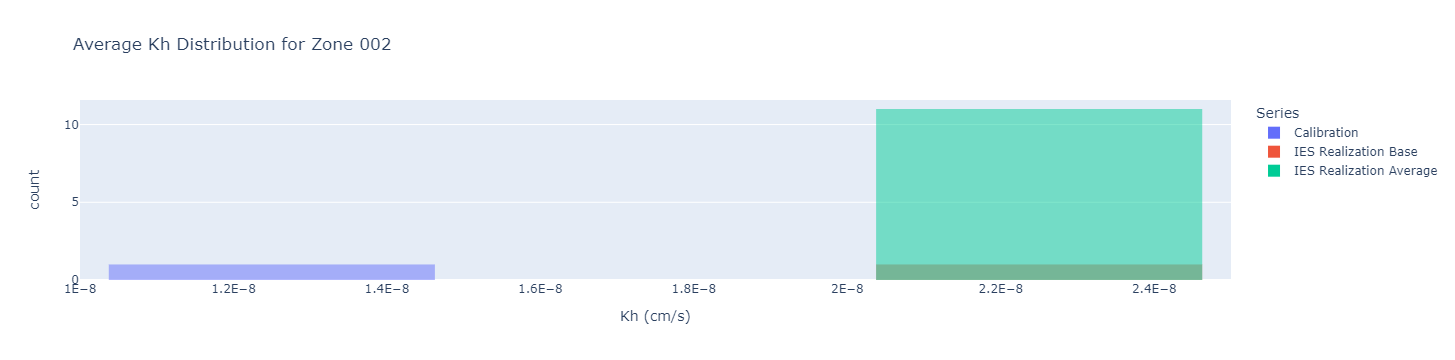

In [23]:
zone_select = 'Zone 002'
fig = px.histogram(hist_df, 
               x= hist_df[zone_select],
               color = 'Series',
               barmode = 'overlay',
               title = 'Average Kh Distribution for {0}'.format(zone_select))
fig.update_layout(xaxis = dict(showexponent = 'all', 
                           exponentformat = 'E',
                           title = 'Kh (cm/s)'),
              bargap = 0.15)
fig.show()